BLG 453E  - Homework 2 <br>
Muhammed Tolga Cangöz - 150130024

In [5]:
import moviepy.video.io.VideoFileClip as vfc
import cv2
import matplotlib.pyplot as plt
import moviepy.editor as mpy
import numpy as np
from tqdm import tqdm

vid = vfc.VideoFileClip("shapes_video.mp4")
frame_count = vid.reader.nframes
video_fps = vid.fps

In [2]:
images_list = []
window = 2
kernel = []
for i in tqdm(range(frame_count)):
    frame = vid.get_frame(i* 1.0 / video_fps)
    new_frame = np.zeros_like(frame)
    for j in range(frame.shape[0]):
        for k in range(frame.shape[1]):
            #median = np.median(frame[np.max(0, j-window):j + window, np.max(0, k-window):k + window, 0])
            new_frame[j,k,0] = np.median(frame[max(0, j-window):j + window, max(0, k-window):k + window, 0])
            new_frame[j,k,1] = new_frame[j,k,0] #np.median(frame[np.max(0, j-window):j + window, np.max(0, k-window):k + window, 1])
            new_frame[j,k,2] = new_frame[j,k,0] #np.median(frame[np.max(0, j-window):j + window, np.max(0, k-window):k + window, 2])
    images_list.append(new_frame)

100%|██████████| 92/92 [16:34<00:00, 10.81s/it]


In [3]:
clip = mpy.ImageSequenceClip(images_list, fps=video_fps)
clip.write_videofile('part1_video.mp4')

Moviepy - Building video part1_video.mp4.
Moviepy - Writing video part1_video.mp4



Moviepy - Done !
Moviepy - video ready part1_video.mp4


In [96]:
backSub = cv2.createBackgroundSubtractorMOG2(history=2, varThreshold=500)

In [99]:
fgMask = backSub.apply(images_list[-29])

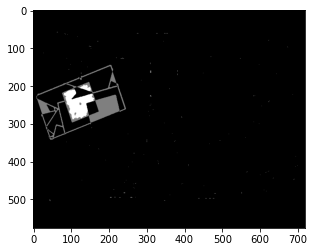

In [100]:
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))
# I couldn't do background subtraction properly, the next card seems messy. 